<a href="https://colab.research.google.com/github/ManishaKumari96/hello-world/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns
import numpy as np
import pandas as pd

In [0]:
from sklearn.datasets.samples_generator import make_blobs

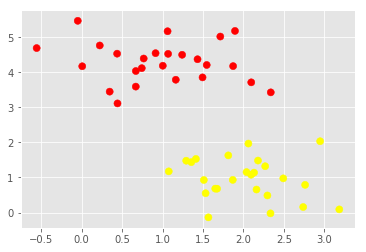

In [0]:
x,y=make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.60)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plt.show()

In [0]:
x

array([[ 1.41281595,  1.5303347 ],
       [ 1.81336135,  1.6311307 ],
       [ 1.43289271,  4.37679234],
       [ 1.87271752,  4.18069237],
       [ 2.09517785,  1.0791468 ],
       [ 2.73890793,  0.15676817],
       [ 3.18515794,  0.08900822],
       [ 2.06156753,  1.96918596],
       [ 2.03835818,  1.15466278],
       [-0.04749204,  5.47425256],
       [ 1.71444449,  5.02521524],
       [ 0.22459286,  4.77028154],
       [ 1.06923853,  4.53068484],
       [ 1.53278923,  0.55035386],
       [ 1.4949318 ,  3.85848832],
       [ 1.1641107 ,  3.79132988],
       [ 0.74387399,  4.12240568],
       [ 2.29667251,  0.48677761],
       [ 0.44359863,  3.11530945],
       [ 0.91433877,  4.55014643],
       [ 1.67467427,  0.68001896],
       [ 2.26908736,  1.32160756],
       [ 1.5108885 ,  0.9288309 ],
       [ 1.65179125,  0.68193176],
       [ 2.49272186,  0.97505341],
       [ 2.33812285,  3.43116792],
       [ 0.67047877,  4.04094275],
       [-0.55552381,  4.69595848],
       [ 2.16172321,

In [0]:
y

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

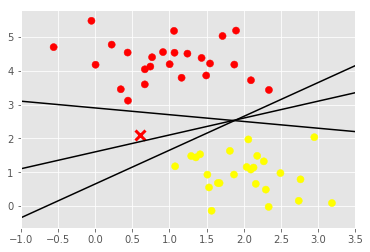

In [0]:
xfit=np.linspace(-1,3.5)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plt.plot([0.6],[2.1],'x',color='red',markeredgewidth=3,markersize=10) # for new data 

for m,b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:  #y=mx+c
  plt.plot(xfit,m* xfit+b,'-k')
  
  
plt.xlim(-1,3.5)
plt.show()

In [0]:
xfit

array([-1.        , -0.90816327, -0.81632653, -0.7244898 , -0.63265306,
       -0.54081633, -0.44897959, -0.35714286, -0.26530612, -0.17346939,
       -0.08163265,  0.01020408,  0.10204082,  0.19387755,  0.28571429,
        0.37755102,  0.46938776,  0.56122449,  0.65306122,  0.74489796,
        0.83673469,  0.92857143,  1.02040816,  1.1122449 ,  1.20408163,
        1.29591837,  1.3877551 ,  1.47959184,  1.57142857,  1.66326531,
        1.75510204,  1.84693878,  1.93877551,  2.03061224,  2.12244898,
        2.21428571,  2.30612245,  2.39795918,  2.48979592,  2.58163265,
        2.67346939,  2.76530612,  2.85714286,  2.94897959,  3.04081633,
        3.13265306,  3.2244898 ,  3.31632653,  3.40816327,  3.5       ])

In [0]:
len(xfit)

50

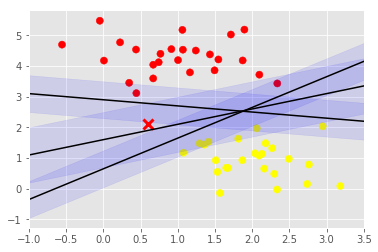

In [0]:
xfit=np.linspace(-1,3.5)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plt.plot([0.6],[2.1],'x',color='red',markeredgewidth=3,markersize=10) # for new data 

for m,b,d  in [(1,0.65,0.6),(0.5,1.6,0.9),(-0.2,2.9,0.6)]:  #y=mx+c
  plt.plot(xfit,m* xfit+b,'-k')
  plt.fill_between(xfit,(m* xfit+b)-d,(m* xfit+b)+d,color='blue',alpha=0.1)
  
plt.xlim(-1,3.5)
plt.show()

In [0]:
from sklearn.svm import SVC
model=SVC(kernel='linear',C=1E10) #error rate
model.fit(x,y)


SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)# xlim=x.min,x.max
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [0]:
x = np.array([1,2,3])
y = np.array([11,12])
Y, X = np.meshgrid(y,X)
A=X.ravel()
B=Y.ravel()
xy = np.vstack([X.ravel(), Y.ravel()]).T


In [0]:
x

array([1, 2, 3])

In [0]:
y

array([11, 12])

In [0]:
xy# ravel

array([[ 1, 11],
       [ 1, 12],
       [ 2, 11],
       [ 2, 12],
       [ 3, 11],
       [ 3, 12]])

In [0]:
X# meshgrid

array([[1, 1],
       [2, 2],
       [3, 3]])

In [0]:
Y

array([[11, 12],
       [11, 12],
       [11, 12]])

In [0]:
A# ignore this

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3])

In [0]:
B# ignore this

array([11, 12, 11, 12, 11, 12, 11, 12, 11, 12, 11, 12, 11, 12, 11, 12, 11,
       12, 11, 12, 11, 12, 11, 12])

In [0]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)   # xlim =(x.min(),x.max())   # ylim =(y.min(),y.max())
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    #plt.scatter(X.ravel(), Y.ravel(),c=model.decision_function(xy),s=50,cmap='autumn',alpha=0.15)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    